**Problem statement: Analyzing the dataset, which captures environmental changes in sea levels, mountains, forests, glaciers, buildings, and streets, aims to understand the diverse impacts of global warming, ranging from rising sea levels and deforestation to temperature shifts in mountainous regions and urban areas, providing valuable insights for climate change monitoring and mitigation strategies.**


*Monitoring the effects of global warming across different environments, countries and cities:*
- Sea: Represents changes in sea levels, monitoring the impact of global warming on oceans and coastal areas.

- Mountain: Indicates regions that are traditionally associated with colder temperatures. Example: The mention of Genting getting higher in temperature suggests potential climate change effects on mountainous regions.

- Forest: Reflects the impact of deforestation, which is a significant contributor to climate change. Monitoring changes in forest cover can provide insights into environmental health.

- Glacier: Represents the melting of glaciers, which is a clear indicator of rising temperatures and global warming.

- Building and Street: These labels can be associated with monitoring urban areas, where the focus is on understanding the effects of human activities, including vehicle emissions and population density. As, carbon dioxide emissions from urban activities contribute to climate change.

1. Importing libraries 

In [2]:
# Import necessary libraries
import numpy as np
import os
from sklearn.utils import shuffle
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from hashlib import md5



2. Define Class Names, Labels, and Image Size

In [3]:
# Define class names and labels
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

# Number of classes
nb_classes = len(class_names)

# Image size for resizing
IMAGE_SIZE = (150, 150)

3. Define the load data function

In [4]:
def load_data():
    """
    Load the data:
        - 14,036 images to train the network.
        - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    # Specify the full paths to the datasets
    train_dataset_path = r'C:\Users\Alam Rithika\Downloads\archive (4)\seg_train\seg_train'
    test_dataset_path = r'C:\Users\Alam Rithika\Downloads\archive (4)\seg_test\seg_test'
    
    datasets = [train_dataset_path, test_dataset_path]
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output


4. Load data

In [5]:
# Call the load_data function to load training and test data
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\Alam Rithika\Downloads\archive (4)\seg_train\seg_train


  0%|          | 0/2191 [00:00<?, ?it/s]

100%|██████████| 2382/2382 [00:04<00:00, 492.93it/s]


Loading C:\Users\Alam Rithika\Downloads\archive (4)\seg_test\seg_test


100%|██████████| 501/501 [00:01<00:00, 482.05it/s]


5. Shuffle training data

In [6]:
# Shuffle the training data using sklearn's shuffle function
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

## **Let's explore the data!**
- How many training and testing examples do we have?
- What is the size of the images?
- What is the proportion of each observed category?
- Visualise some sample images from different classes!
- Explore any class imbalances and decide on strategies to address them!
- Are there any duplicates found?



6. Displaying information about dataset

In [7]:
# Get the number of training and testing examples
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

# Print information about the dataset
print("Number of training examples: {}".format(n_train))
print("Number of testing examples: {}".format(n_test))
print("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


7. Visualizing Class Distribution in Training and Testing Data

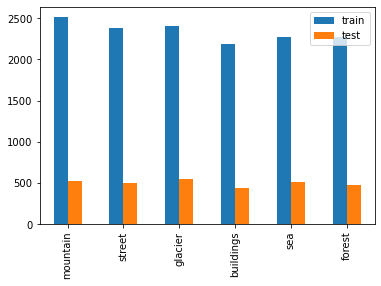

In [8]:

# Get counts of each class in training and testing data
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
# DataFrame for visualization
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

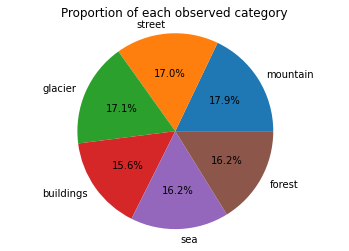

In [8]:
# Plot a pie chart to visualize the proportion of each class in the training data
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0),  # Set explode to create separation between slices (0 for no separation)
        labels=class_names,           # Set labels for each slice
        autopct='%1.1f%%')            # Display percentage on each slice

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Set the title of the pie chart
plt.title('Proportion of each observed category')

# Show the pie chart
plt.show()


**The classes have equal distribution of images. Hence there is no class imbalancing.**

Since there is no class imbalance in my dataset, it means that each class has a relatively equal number of examples. In this case, i do not need to apply specific techniques related to class imbalance because the distribution of classes is already balanced.





***However***, if i did have class imbalance, where some classes have significantly more or fewer examples than others, it could lead to issues during training, as the model may become biased towards the majority class. To address class imbalance, several techniques can be applied:

1. Resampling:

Oversampling: Increase the number of instances in the minority class by replicating or generating new instances. This helps the model to give equal attention to all classes.
Undersampling: Reduce the number of instances in the majority class to balance it with the minority class. This can be done randomly or using more sophisticated techniques.

2. Weighted Loss:

Assign different weights to the classes during training. This way, the model gives more importance to the minority class.
Data Augmentation:

Introduce variations in the existing data through techniques like rotation, zoom, and shear. This can help generate diverse examples for all classes.

3. Ensemble Methods:

Use ensemble methods, such as bagging and boosting, to combine multiple models trained on different subsets of the data. This can mitigate the impact of class imbalance.

4. Synthetic Data Generation:

Generate synthetic samples for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).




8. Check for duplicates

In [9]:
# Function to compute the hash of an image
def compute_image_hash(image):
    return md5(image).hexdigest()

# Function to check for duplicates in a list of images
def find_duplicate_images(images):
    image_hashes = {}
    duplicates = []

    for i, image in enumerate(images):
        # Convert the image to bytes
        image_bytes = image.tobytes()

        # Compute the hash of the image
        image_hash = compute_image_hash(image_bytes)

        # Check if the hash is already in the dictionary
        if image_hash in image_hashes:
            duplicates.append((i, image_hashes[image_hash]))
        else:
            image_hashes[image_hash] = i

    return duplicates

# Assuming train_images is your list of images
duplicates = find_duplicate_images(train_images)

if duplicates:
    print("Duplicate images found:")
    for pair in duplicates:
        print(f"Image #{pair[0]} is a duplicate of Image #{pair[1]}")
else:
    print("No duplicate images found.")


Duplicate images found:
Image #4399 is a duplicate of Image #1112
Image #4984 is a duplicate of Image #2526
Image #6462 is a duplicate of Image #2395
Image #7449 is a duplicate of Image #6713
Image #7464 is a duplicate of Image #2412
Image #9091 is a duplicate of Image #8711
Image #10295 is a duplicate of Image #8751
Image #10548 is a duplicate of Image #2339
Image #11077 is a duplicate of Image #1651
Image #11147 is a duplicate of Image #2640
Image #11647 is a duplicate of Image #5573
Image #11760 is a duplicate of Image #8871
Image #12102 is a duplicate of Image #10195
Image #12975 is a duplicate of Image #11223
Image #13596 is a duplicate of Image #6131


- This code uses MD5 hashing to generate unique identifiers for each image and checks for duplicates based on these identifiers.
- As you can see from the above output that they are certainly a few duplicates.
- However, in order to further confirm that there are indeed duplicates, i need to visualize the comparison of the first five sets of images that claim to be duplicates.

9. Display the original images and their duplicate

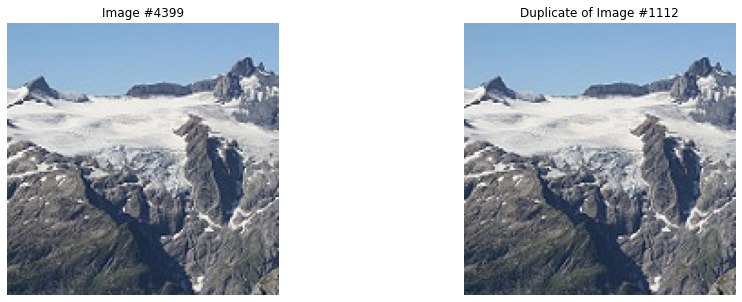

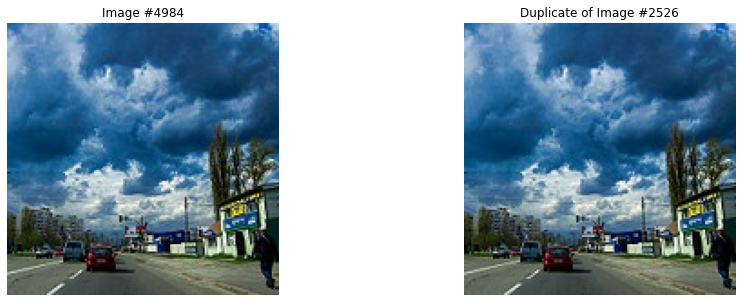

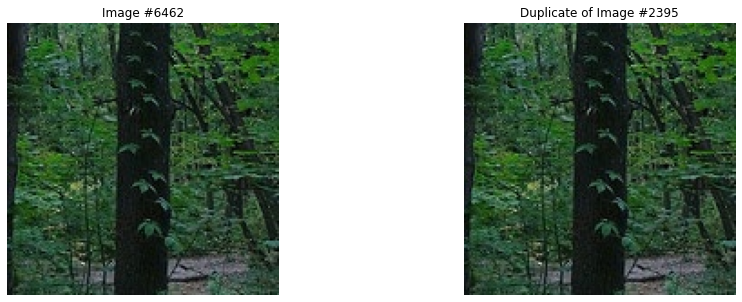

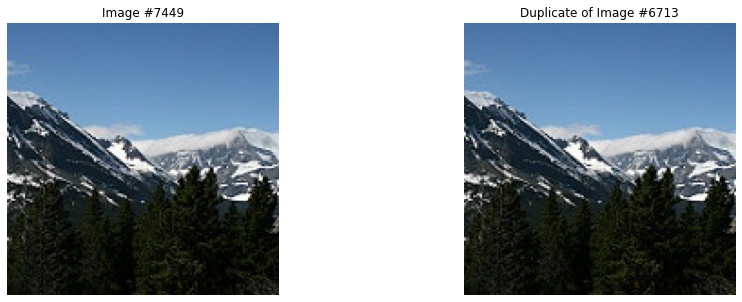

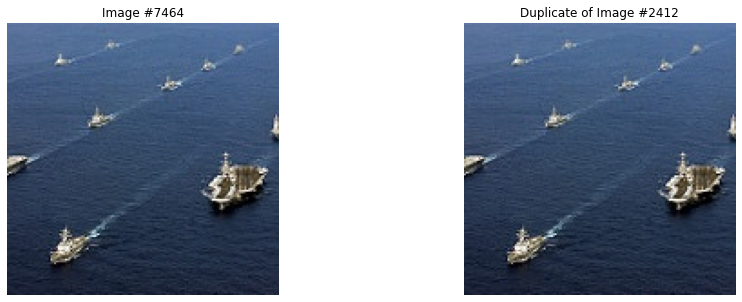

In [10]:
# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Display the first five sets of duplicate images
for i in range(5):
    # Get the indices of the duplicate images
    original_index, duplicate_index = duplicates[i]

    # Retrieve the images for visualization
    original_image = train_images[original_index].astype(np.uint8)
    duplicate_image = train_images[duplicate_index].astype(np.uint8)

    # Display the images
    display_images([original_image, duplicate_image],
                   [f"Image #{original_index}", f"Duplicate of Image #{duplicate_index}"])


10.  Remove duplicates

In [11]:
# Function to remove duplicates from the dataset
def remove_duplicates(images, duplicate_indices):
    unique_indices = set(range(len(images))) - set(duplicate_indices)
    unique_images = [images[i] for i in unique_indices]
    return unique_images

# Remove duplicates from the training images
train_images = remove_duplicates(train_images, [pair[0] for pair in duplicates])

# Remove duplicates from labels as well
train_labels = np.delete(train_labels, [pair[0] for pair in duplicates])

# Display the number of images before and after removing duplicates
print("Number of images before removing duplicates:", len(train_images) + len(duplicates))
print("Number of images after removing duplicates:", len(train_images))


Number of images before removing duplicates: 14034
Number of images after removing duplicates: 14019


- Removing duplicates from a dataset is crucial for maintaining data integrity and improving model performance. - Duplicates can introduce noise, leading to biased training and poor generalization. 
- Removing them ensures fair evaluation, prevents overfitting, and enhances computational efficiency by avoiding redundant information during training. 
- It results in a more accurate representation of unique examples, which is essential for building robust and effective models.

11. Scale the data

In [12]:
# Convert the list of images to a NumPy array
train_images = np.array(train_images)

# Normalize pixel values in training data
train_images = train_images / 255.0

# Assuming test_images is also a list, convert it to a NumPy array and normalize
test_images = np.array(test_images) / 255.0


12. Visualise the data
- We can display a random image from the training set

In [13]:
def display_random_image(class_names, images, labels):
    """Display a random image from the images array and its corresponding label from the labels array."""

    # Generate a random index within the range of the number of images
    index = np.random.randint(images.shape[0])

    # Create a new figure
    plt.figure()

    # Display the image using imshow
    plt.imshow(images[index])

    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])

    # Turn off grid lines
    plt.grid(False)

    # Set the title of the image using the corresponding class name
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])

    # Show the image
    plt.show()


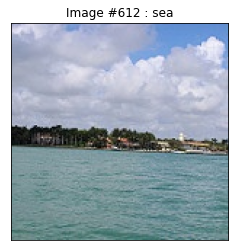

In [14]:
display_random_image(class_names, train_images, train_labels)

- We can also display the first 25 images from the training set directly with a loop to get a better view

In [15]:
def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with their corresponding labels.
    """

    # Create a new figure with a specified size
    fig = plt.figure(figsize=(10,10))

    # Set the overall title for the set of images
    fig.suptitle("Some examples of images from the dataset", fontsize=16)

    # Iterate over 25 examples
    for i in range(25):
        # Create a subplot with 5 rows and 5 columns
        plt.subplot(5, 5, i + 1)

        # Remove x and y ticks
        plt.xticks([])
        plt.yticks([])

        # Turn off grid lines
        plt.grid(False)

        # Display the image using imshow
        plt.imshow(images[i], cmap=plt.cm.binary)

        # Set the label for each image using the corresponding class name
        plt.xlabel(class_names[labels[i]])

    # Show the grid of images
    plt.show()


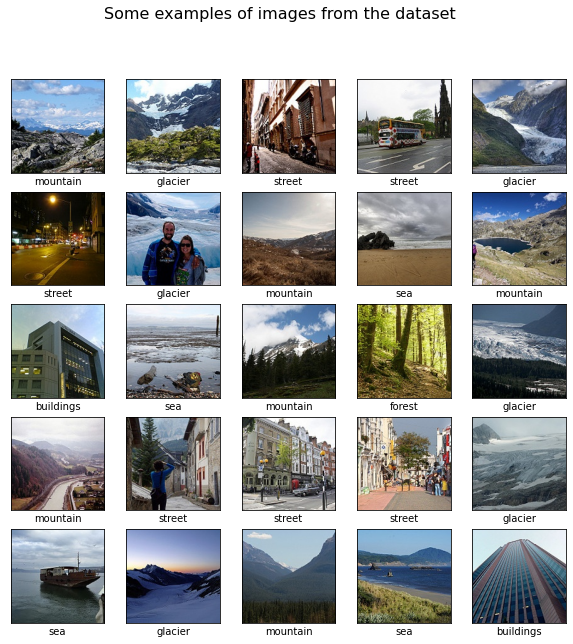

In [16]:
display_examples(class_names, train_images, train_labels)

## Let's proceed with pre-processing!
- Normalization
- Data Augmentation

13. Normalization

In [16]:
# Use scikit-learn's MinMaxScaler to normalize pixel values to the range [0, 1]
from sklearn.preprocessing import MinMaxScaler

# Reshape images to 1D arrays
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit on training data and transform both training and testing data
train_images_normalized = scaler.fit_transform(train_images_flat)
test_images_normalized = scaler.transform(test_images_flat)

# Reshape the normalized data back to the original shape
train_images_normalized = train_images_normalized.reshape(train_images.shape)
test_images_normalized = test_images_normalized.reshape(test_images.shape)


14. Data Augmentation

In [17]:
import torchvision.transforms as transforms

# Training Data Transformations with Additional Augmentation
train_transforms = transforms.Compose([
    # Resize the image to a fixed size (150x150 pixels)
    transforms.Resize(size=(150, 150)),

    # Apply color jitter for random changes in brightness and contrast with a more subtle effect
    transforms.ColorJitter(brightness=0.2, contrast=0.1),

    # Randomly flip the image horizontally with a probability of 0.5
    transforms.RandomHorizontalFlip(p=0.5),

    # Randomly flip the image vertically with a probability of 0.5
    transforms.RandomVerticalFlip(p=0.5),

    # Randomly rotate the image up to 30 degrees
    transforms.RandomRotation(degrees=30),

    # Apply a random affine transformation including translation and shear
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), shear=10),

    # Randomly crop the image to the specified size (150x150 pixels)
    transforms.RandomResizedCrop(size=(150, 150), scale=(0.8, 1.0)),

    # Randomly convert the image to grayscale with a 20% chance
    transforms.RandomGrayscale(p=0.2),

    # Convert the image to a PyTorch tensor
    transforms.ToTensor(),

    # Normalize the tensor by subtracting the mean and dividing by the standard deviation
    transforms.Normalize((0.425, 0.415, 0.405), (0.205, 0.205, 0.205))
])

# Testing Data Transformations
test_transforms = transforms.Compose([
    # Resize the image to a fixed size (150x150 pixels)
    transforms.Resize((150, 150)),

    # Convert the image to a PyTorch tensor
    transforms.ToTensor(),

    # Normalize the tensor using mean and standard deviation
    transforms.Normalize((0.425, 0.415, 0.405), (0.255, 0.245, 0.235))
])



- Randomly showing original and transformed image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


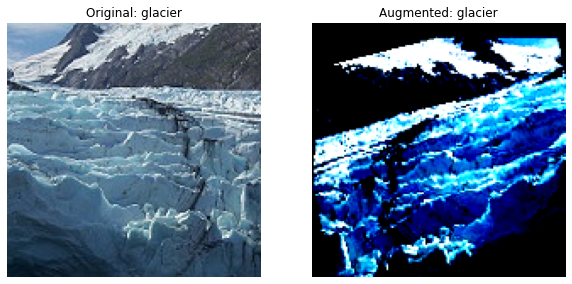

In [18]:
from PIL import Image
import random

# Function to display original and augmented images side by side
def display_augmented_images(original_images, augmented_images, labels, class_names):
    # Generate a random index within the range of the number of images
    index = random.randint(0, len(original_images) - 1)

    # Create a new figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image on the left subplot
    axs[0].imshow(original_images[index])
    axs[0].set_title('Original: ' + class_names[labels[index]])
    axs[0].axis('off')

    # Display the augmented image on the right subplot
    axs[1].imshow(augmented_images[index])
    axs[1].set_title('Augmented: ' + class_names[labels[index]])
    axs[1].axis('off')

    # Show the figure
    plt.show()

# Choose a random image from the training set
index = np.random.randint(train_images.shape[0])

# Convert the NumPy array to a PIL Image
original_image_pil = Image.fromarray((train_images[index] * 255).astype(np.uint8))

# Apply the transformations to the chosen image
transformed_image_pil = train_transforms(original_image_pil)

# Convert the transformed image to a NumPy array and remove the batch dimension
transformed_image = np.array(transformed_image_pil).transpose((1, 2, 0))

# Display the original and augmented images
display_augmented_images([original_image_pil], [transformed_image], [train_labels[index]], class_names)


12. Image semgmentation

13. Creating model
- Now, Create a baseline model to predict the class labels. Will be using Lenet 5 model!

In [20]:
# from tensorflow.keras import models, layers, optimizers

# model = models.Sequential()

# model.add(layers.Conv2D(200, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(layers.Conv2D(180, kernel_size=(3, 3), activation='relu'))
# model.add(layers.MaxPool2D(5, 5))
# model.add(layers.Conv2D(180, kernel_size=(3, 3), activation='relu'))
# model.add(layers.Conv2D(140, kernel_size=(3, 3), activation='relu'))
# model.add(layers.Conv2D(100, kernel_size=(3, 3), activation='relu'))
# model.add(layers.Conv2D(50, kernel_size=(3, 3), activation='relu'))
# model.add(layers.MaxPool2D(5, 5))
# model.add(layers.Flatten())
# model.add(layers.Dense(180, activation='relu'))
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dense(50, activation='relu'))
# model.add(layers.Dropout(rate=0.5))
# model.add(layers.Dense(6, activation='softmax'))

# model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.summary()


In [19]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

- Now, lets train the model with validation split equal to 30% from training data. Validation split is used to determine that our model is not geting over-fitted.

In [20]:
trained = model.fit(train_images_normalized, train_labels, batch_size=1000, epochs=13, validation_split=0.30)

Epoch 1/13


10/10 [==============================] - 186s 10s/step - loss: 2.9228 - accuracy: 0.2075 - val_loss: 1.6947 - val_accuracy: 0.2753
Epoch 2/13
10/10 [==============================] - 85s 8s/step - loss: 1.5784 - accuracy: 0.3524 - val_loss: 1.2500 - val_accuracy: 0.5193
Epoch 3/13
10/10 [==============================] - 69s 7s/step - loss: 1.1294 - accuracy: 0.5607 - val_loss: 1.0609 - val_accuracy: 0.5777
Epoch 4/13
10/10 [==============================] - 67s 7s/step - loss: 0.9828 - accuracy: 0.6229 - val_loss: 0.9521 - val_accuracy: 0.6346
Epoch 5/13
10/10 [==============================] - 60s 6s/step - loss: 0.8820 - accuracy: 0.6714 - val_loss: 0.8993 - val_accuracy: 0.6698
Epoch 6/13
10/10 [==============================] - 65s 7s/step - loss: 0.8016 - accuracy: 0.7096 - val_loss: 0.8690 - val_accuracy: 0.6755
Epoch 7/13
10/10 [==============================] - 60s 6s/step - loss: 0.7412 - accuracy: 0.7369 - val_loss: 0.8095 - val_accuracy: 0.7007
Epoch 8/13
10/10

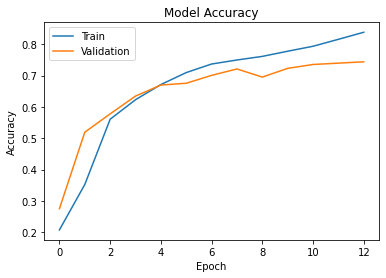

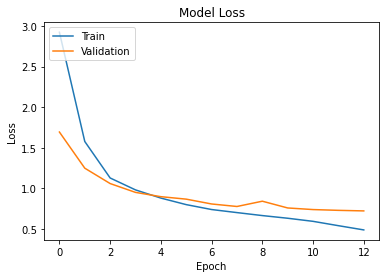

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
test_loss = model.evaluate(test_images_normalized, test_labels)

94/94 [==============================] - 5s 47ms/step - loss: 0.7209 - accuracy: 0.7480


**My train accuracy is 0.8383% while my test accuracy is 0.7480%.** 

I got higher training accuracy as compared to my test accuracy, which is a common issue known as overfitting. Overfitting occurs when a model learns the training data too well, capturing noise and specific details that don't generalize to unseen data.

These are some strategies i will be using to address overfitting in the future:


**1. Regularization Techniques:**

Dropout: Add dropout layers in my future models. This will help prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.

Weight Regularization: Apply L1 or L2 regularization on the kernel weights.

**2. Model Complexity:**

Add more layers to my future models so that it can capture more intricate patterns in the data.


^^ part of future enhancement!

14. Classification Report
- The classification report provides a comprehensive evaluation of your model's performance.

In [28]:
from sklearn.metrics import classification_report

# Assuming pred_labels is the predicted labels from your model
pred_labels = model.predict(test_images_normalized).argmax(axis=1)

# Generate classification report
class_report = classification_report(test_labels, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", class_report)


94/94 [==============================] - 4s 42ms/step
Classification Report:
               precision    recall  f1-score   support

    mountain       0.71      0.68      0.70       525
      street       0.80      0.77      0.78       501
     glacier       0.75      0.71      0.73       553
   buildings       0.60      0.78      0.68       437
         sea       0.73      0.71      0.72       510
      forest       0.94      0.86      0.90       474

    accuracy                           0.75      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.76      0.75      0.75      3000



1. Precision: The model shows reasonably good precision across different classes, ranging from 60% to 94%. This indicates that when the model predicts a certain class, it is often correct.

2. Recall: Recall values are generally high, suggesting that the model effectively captures a large portion of the actual positive instances for each class.

3. F1-Score: The F1-scores are balanced, considering both precision and recall. This implies a good trade-off between precision and recall, resulting in a model that performs well in terms of classification accuracy.

4. Overall Accuracy: The weighted average accuracy is 75%, indicating that the model correctly classifies 75% of the instances in the test set

15. Error analysis
- We can try to understand on which kind of images the classifier has trouble.

94/94 [==============================] - 4s 36ms/step


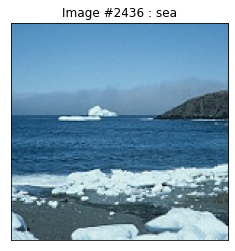

In [25]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [23]:
def print_mislabeled_images(class_names, test_images_normalized, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images_normalized[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

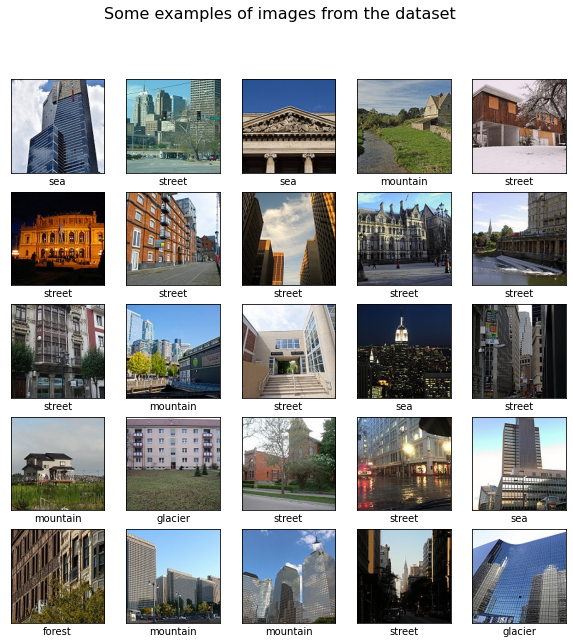

In [27]:
print_mislabeled_images(class_names, test_images_normalized, test_labels, pred_labels)

16. Confusion matrix

- Examine the confusion matrix to identify which classes are being misclassified more. This can help understand specific challenges in the model.

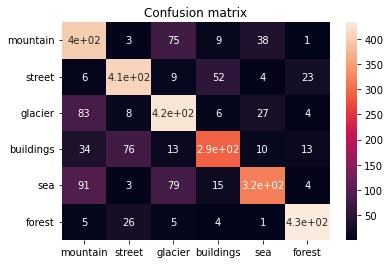

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In conclusion, after examining the misplaced images and the confusion matrix, it seems that the classifier has trouble with 2 kinds of images.
It has trouble with street and buildings. Well, it can be understandable as as there are buildings in the street. It has also trouble with sea, glacier and moutain as well. It is hard for me to fully distinguish them. However, it can detects forest very accurately!

## Summary of Part 1




**1. Data Loading:**

- Loaded a dataset consisting of six classes: mountain, street, glacier, buildings, sea, and forest.
- Leveraged OpenCV and os libraries to read, resize, and organize the image data.

**2. Data Exploration:**

- Explored the dataset to understand its structure and characteristics.
- Checked the number of training and testing examples available.
Image Size:

- Investigated the size of the images to gain insights into the data format.
- Analyzed the distribution of examples across different categories (mountain, street, glacier, buildings, sea, forest).
- Assessed whether each category had a balanced representation. (It did not have class imbalance)


- Visualized sample images from various classes to get a qualitative understanding.
- Checked for any distinctive features or challenges in classification.
Class Imbalances:


- Checked for duplicate images within the dataset.
- Removing duplicates to maintain data integrity and avoid bias.


**3. Data Preprocessing:**

- Reshaped and normalized images to facilitate model training.
- Shuffled the training data to enhance model learning.
- Used scikit-learn's MinMaxScaler for efficient pixel value normalization.

- Implemented data augmentation techniques using PyTorch transforms.
- Included resizing, color jitter, random flips, rotations, affine transformations, and cropping.
- Aimed to improve model robustness by exposing it to varied training samples.


**4. Modelling:**

- Built a convolutional neural network (CNN) using TensorFlow/Keras.
- Designed a simple architecture with convolutional and pooling layers.
- Compiled the model with the Adam optimizer and sparse categorical crossentropy loss.


- Trained the model on the preprocessed and augmented data.
- Monitored training accuracy, validation accuracy, and loss during epochs.

- Assessed the model's performance using accuracy metrics.
- Use additional metrics like precision, recall and F1 score for more in depth understading.
- Analyzed a confusion matrix and visualized misplaced images to understand class-wise classification.

## Future Improvements
- How i plan to improve
- What i plan to do

**Model Variety and Diversity:**

1. Explore Transfer Learning:

Utilize pre-trained models such as VGG16, ResNet, or Inception as a starting point. Fine-tune these models on your specific dataset to leverage their learned representations.

2. Experiment with Architectures:

Explore a variety of architectures, including deeper convolutional neural networks (CNNs). Consider architectures like DenseNet, EfficientNet, or NASNet for improved feature extraction.

3. Ensemble Models:

Build ensemble models by combining predictions from various architectures. This could involve training different architectures independently and combining their outputs.

**Superior Accuracy on Test Set:**

1. Hyperparameter Tuning:

Implement systematic hyperparameter tuning using techniques like grid search or random search. Adjust parameters such as learning rate, batch size, and regularization to improve model performance.

2. Learning Rate Scheduling:

Apply learning rate schedules to adaptively adjust the learning rate during training, improving convergence and avoiding overshooting.

**Fine-Tuning Process:**

1. Regularization Techniques:

Incorporate dropout or other regularization techniques to prevent overfitting during the fine-tuning process.

2. Batch Normalization:

Add batch normalization layers to accelerate training and improve the generalization of the fine-tuned models.

**Evaluation and Comparison:**

1. Comprehensive Evaluation:

Evaluate models based on various metrics, including accuracy, precision, recall, and F1-score. Use tools like confusion matrices for a detailed analysis of model performance.

2. Thorough Model Comparison:

Compare the performance of different models systematically. Provide detailed insights into how each model addresses specific challenges in the dataset.

**Important:**

1. Continuous Monitoring:

Continuously monitor the model's performance during training and validation. Make adjustments to hyperparameters or model architectures based on the observed trends.

2. Error Analysis:

Conduct in-depth error analysis to identify specific classes or instances where models struggle. Use this analysis to guide further adjustments or data collection strategies.

3. Documentation:

Thoroughly document the fine-tuning process, hyperparameter choices, and model comparisons. This documentation should provide a clear and concise record of the experimentation process.

**Models:**

1. Transfer Learning Models:

- VGG16
- ResNet
- Inception

2. Diverse CNN Architectures:

- DenseNet
- EfficientNet
- NASNet

3. Ensemble Models:

Combine predictions from multiple models, including the ones mentioned above.